# Курс "Программирование на языке Python. Уровень 4. Анализ и визуализация данных на языке Python. Библиотеки numpy, pandas, matplotlib"

## Модуль 9. Временные ряды в pandas

1. Работа с датами в Python
2. Объект TimeSeries в Pandas - особенности, срезы и пр.
4. Частоты и периоды, ресемплинг, сдвиг
5. Статистический анализ временных рядов: "скользящее окно" и STL-декомпозиция

Для работы загрузите в директорию ```data``` следующие данные (их можно загрузить прямо отсюда, через "Сохранить как..."):
- [data/macrodata.csv](https://github.com/easyise/spec_python_courses/raw/master/python04-analysis/data/macrodata.csv)
- [data/web_traffic.tsv](https://github.com/easyise/spec_python_courses/raw/master/python04-analysis/data/web_traffic.tsv)
- [data/monthly-temperature-in-celsius-j.csv](https://github.com/easyise/spec_python_courses/raw/master/python04-analysis/data/monthly-temperature-in-celsius-j.csv)
- [data/monthly-australian-wine-sales.csv](https://github.com/easyise/spec_python_courses/raw/master/python04-analysis/data/monthly-australian-wine-sales.csv)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import date
from datetime import timedelta

import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (10.0, 10.0)
%matplotlib inline


### Дата и время в Python

Модуль для работы с датами - ```datetime```.

В нем следующие классы:
- datetime.date
- datetime.timedelta
- datetime.datetime

При работе ориентируемся на ISO-стандарт хранения даты и времени в виде текстовой строки: \
```YYYY-MM-DD HH:MM:SS.mmm```.

Этот старндарт используется в SQL, JavaScript и других языках программирования, принимается множеством API.

Для создания даты из такой строки используйте метод ```datetime.fromisoformat()```.
Сохранить дату в ISO-формате: ```datetime.isoformat()```.

Текущее местное время: ```datetime.today()```. Время по UTC: ```datetime.utcnow()```

**ВНИМАНИЕ!** Смещение часового пояса относительно UTC используйте только если вы действительно работаете с данными в разных часовых поясах. Если это не требуется (и не может портребоваться в перспективе) - не используйте этот параметр.

In [3]:
now = datetime.today()
print(now.timestamp())
print(now.isoformat())

unixEpoch = datetime.fromisoformat("1970-01-01 03:00")
print(unixEpoch.timestamp())

# то же самое - с датами
today = date.today()
print(today.isoformat())

# Можно создать дату, зная месяц, год и число:
gagarin_date = date(1961, 4, 12)
print(gagarin_date)

1639064885.655519
2021-12-09T18:48:05.655519
0.0
2021-12-09
1961-04-12


Преобразование дат в строку: ```datetime.strftime()```

Пример преобразования в строку в соответствии с ISO-форматом:
```somedate.strftime('%Y-%m-%d %H:%M:%S')```

#### ЗАДАНИЕ. Преобразуйте сегодняшнюю дату в формат ДД.ММ.ГГГГ ЧЧ:ММ

In [4]:
# ваш код здесь
now.strftime('%d.%m.%Y %H:%M')

'09.12.2021 18:48'

#### Разница во времени, временные интервалы

Используем класс ```timedelta```. "Дельты" можно складывать с датами и датой/временем, друг с другом, делить, умножать и так далее.

In [9]:
delta = timedelta(
    days=50,\
    seconds=27,\
    microseconds=10,\
    milliseconds=29000,\
    minutes=5,\
    hours=8,\
    weeks=2\
)

now_plus_delta = now + delta
print(now_plus_delta.isoformat())

mins_15 = timedelta(minutes = 15) 

now_plus_half_hour = datetime.today() + mins_15*2
print(now_plus_half_hour)

print(now_plus_delta > now_plus_half_hour)

2022-02-12T02:54:01.655529
2021-12-09 19:28:07.309340
True


#### ПРАКТИКА

1. Создайте массив numpy из 10 дат, которые соответствуют текущей и далее + 10 дней.

2. Создайте объект series, который включает все значаения времени, которые отстают от текущего на час, полчаса, 15 минут и так далее с точностью до минуты.

In [11]:
today = date.today()
now = datetime.now()
# ваш код здесь

dates = []
datedelta = timedelta(days=10)
for i in range(10):
    dates.append(today + datedelta*i)
npdates = np.array(dates)
npdates


array([datetime.date(2021, 12, 9), datetime.date(2021, 12, 19),
       datetime.date(2021, 12, 29), datetime.date(2022, 1, 8),
       datetime.date(2022, 1, 18), datetime.date(2022, 1, 28),
       datetime.date(2022, 2, 7), datetime.date(2022, 2, 17),
       datetime.date(2022, 2, 27), datetime.date(2022, 3, 9)],
      dtype=object)

In [12]:
np.array( [today + timedelta(days=i*10) for i in range(10)] )

array([datetime.date(2021, 12, 9), datetime.date(2021, 12, 19),
       datetime.date(2021, 12, 29), datetime.date(2022, 1, 8),
       datetime.date(2022, 1, 18), datetime.date(2022, 1, 28),
       datetime.date(2022, 2, 7), datetime.date(2022, 2, 17),
       datetime.date(2022, 2, 27), datetime.date(2022, 3, 9)],
      dtype=object)

In [15]:
times = []
tdelta = timedelta(hours=1)
while tdelta > timedelta(minutes=1):
    times.append(now - tdelta)
    tdelta /= 2

pd.Series(times)

0   2021-12-09 18:11:03.989533
1   2021-12-09 18:41:03.989533
2   2021-12-09 18:56:03.989533
3   2021-12-09 19:03:33.989533
4   2021-12-09 19:07:18.989533
5   2021-12-09 19:09:11.489533
dtype: datetime64[ns]

In [19]:
times = [] 
now = datetime.now()
tdelta = timedelta(hours=1) 
while tdelta > timedelta(minutes=1): 
    times.append(now - tdelta) 
    tdelta /= 2 
pd.Series(times)

0   2021-12-09 18:25:39.294323
1   2021-12-09 18:55:39.294323
2   2021-12-09 19:10:39.294323
3   2021-12-09 19:18:09.294323
4   2021-12-09 19:21:54.294323
5   2021-12-09 19:23:46.794323
dtype: datetime64[ns]

### Объект TimeSeries

Создадим простой временной ряд в pandas:

In [20]:
n = 10
values = np.random.randn(n)
dates = [ datetime.fromisoformat('2011-10-19') + i*timedelta(days=2) for i in range(n) ]
print(dates)
ts = pd.Series(values, index=dates)
ts

[datetime.datetime(2011, 10, 19, 0, 0), datetime.datetime(2011, 10, 21, 0, 0), datetime.datetime(2011, 10, 23, 0, 0), datetime.datetime(2011, 10, 25, 0, 0), datetime.datetime(2011, 10, 27, 0, 0), datetime.datetime(2011, 10, 29, 0, 0), datetime.datetime(2011, 10, 31, 0, 0), datetime.datetime(2011, 11, 2, 0, 0), datetime.datetime(2011, 11, 4, 0, 0), datetime.datetime(2011, 11, 6, 0, 0)]


2011-10-19    0.722422
2011-10-21   -0.920180
2011-10-23   -0.829475
2011-10-25    0.629302
2011-10-27   -0.113213
2011-10-29   -0.655922
2011-10-31    0.716362
2011-11-02   -0.167411
2011-11-04    0.445733
2011-11-06   -0.724445
dtype: float64

In [21]:
ts.index

DatetimeIndex(['2011-10-19', '2011-10-21', '2011-10-23', '2011-10-25',
               '2011-10-27', '2011-10-29', '2011-10-31', '2011-11-02',
               '2011-11-04', '2011-11-06'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts.index.dtype # данные в индексе хранятся с точностью до наносекунды

dtype('<M8[ns]')

К временному ряду можно обращаться по порядковому номеру позиции или по дате в iso-формате:

In [23]:
ts[0]

0.7224216879852776

In [25]:
ts['2011-10-19']

0.7224216879852776

...а также по части даты, которая может быть интерпретирована как день, месяц, год (час, минута, секунда и пр.)

In [27]:
n = 1000
ts_long = pd.Series(np.random.randn(n), \
               index=[ datetime.fromisoformat('2020-10-19') + i*timedelta(days=2) for i in range(n)])
ts_long

2020-10-19   -1.075646
2020-10-21    0.933059
2020-10-23   -0.575348
2020-10-25    0.209805
2020-10-27    0.088474
                ...   
2026-04-01   -1.434314
2026-04-03    0.448973
2026-04-05    2.978258
2026-04-07    0.736215
2026-04-09    0.359655
Length: 1000, dtype: float64

In [28]:
ts_long['2021']

2021-01-01    0.752653
2021-01-03    0.804344
2021-01-05   -0.610700
2021-01-07   -1.899060
2021-01-09   -0.078099
                ...   
2021-12-23   -0.709928
2021-12-25   -1.670075
2021-12-27    0.695230
2021-12-29   -0.994674
2021-12-31    0.017714
Length: 183, dtype: float64

In [29]:
ts_long['2020-12']

2020-12-02   -1.966787
2020-12-04    1.556531
2020-12-06    0.489252
2020-12-08    0.585597
2020-12-10    1.002397
2020-12-12   -0.092207
2020-12-14    1.833315
2020-12-16   -0.071455
2020-12-18   -1.150386
2020-12-20    0.570965
2020-12-22   -1.288563
2020-12-24   -0.630504
2020-12-26    0.362215
2020-12-28    0.004767
2020-12-30   -1.153691
dtype: float64

...срезы тоже работают:

In [30]:
ts_long['2020-10-21':'2020-11-02']

2020-10-21    0.933059
2020-10-23   -0.575348
2020-10-25    0.209805
2020-10-27    0.088474
2020-10-29    1.306616
2020-10-31    0.189390
2020-11-02   -1.006000
dtype: float64

In [31]:
ts_long[:datetime.today()]

2020-10-19   -1.075646
2020-10-21    0.933059
2020-10-23   -0.575348
2020-10-25    0.209805
2020-10-27    0.088474
                ...   
2021-12-01   -1.245282
2021-12-03   -0.154719
2021-12-05   -1.069469
2021-12-07    0.072135
2021-12-09   -0.980665
Length: 209, dtype: float64

Также для этого можно использовать метод ```truncate()``` - это выражение читается как "обрежь все до ...":

In [32]:
ts_long.truncate(before='2026-03-01')

2026-03-02    0.511515
2026-03-04   -1.268929
2026-03-06    0.053995
2026-03-08   -0.960002
2026-03-10   -1.836683
2026-03-12   -0.869818
2026-03-14   -0.087939
2026-03-16   -1.068094
2026-03-18   -1.191044
2026-03-20   -0.154995
2026-03-22   -2.338365
2026-03-24   -1.440817
2026-03-26    0.731431
2026-03-28    1.221174
2026-03-30    0.255653
2026-04-01   -1.434314
2026-04-03    0.448973
2026-04-05    2.978258
2026-04-07    0.736215
2026-04-09    0.359655
dtype: float64

__ЗАДАНИЕ:__ выведите данные, которые у нас есть в ряду ts_long на апрель 2023 года, просуммируйте их

In [35]:
# ваш код здесь
ts_april_2023=ts_long['2023-04']
np.sum(ts_april_2023)

-2.037922115264493

In [39]:
(ts_long.truncate(before='2023-04-01', after='2023-04-30')).sum()

-2.037922115264493

### Диапазоны дат, ресемплинг, сдвиг

Для генерации диапазонов дат можно использовать метод ```date_range()```:

In [40]:
index = pd.date_range('2020-10-01', '2020-12-01')
index

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-08',
               '2020-10-09', '2020-10-10', '2020-10-11', '2020-10-12',
               '2020-10-13', '2020-10-14', '2020-10-15', '2020-10-16',
               '2020-10-17', '2020-10-18', '2020-10-19', '2020-10-20',
               '2020-10-21', '2020-10-22', '2020-10-23', '2020-10-24',
               '2020-10-25', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-10-31', '2020-11-01',
               '2020-11-02', '2020-11-03', '2020-11-04', '2020-11-05',
               '2020-11-06', '2020-11-07', '2020-11-08', '2020-11-09',
               '2020-11-10', '2020-11-11', '2020-11-12', '2020-11-13',
               '2020-11-14', '2020-11-15', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-21',
               '2020-11-22', '2020-11-23', '2020-11-24', '2020-11-25',
      

Можно задать не диапазон дат, а стартовое или конечное значение и количество элементов:

In [41]:
pd.date_range('2020-10-19 15:00', periods=20)

DatetimeIndex(['2020-10-19 15:00:00', '2020-10-20 15:00:00',
               '2020-10-21 15:00:00', '2020-10-22 15:00:00',
               '2020-10-23 15:00:00', '2020-10-24 15:00:00',
               '2020-10-25 15:00:00', '2020-10-26 15:00:00',
               '2020-10-27 15:00:00', '2020-10-28 15:00:00',
               '2020-10-29 15:00:00', '2020-10-30 15:00:00',
               '2020-10-31 15:00:00', '2020-11-01 15:00:00',
               '2020-11-02 15:00:00', '2020-11-03 15:00:00',
               '2020-11-04 15:00:00', '2020-11-05 15:00:00',
               '2020-11-06 15:00:00', '2020-11-07 15:00:00'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range(end='2020-11-02', periods=20)

DatetimeIndex(['2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
               '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31', '2020-11-01', '2020-11-02'],
              dtype='datetime64[ns]', freq='D')

Обратите внимание на свойство ```freq``` - параметр с таким именем задаст частоту генерации временного ряда. Наиболее часто используемые значения этого параметра следующие:
- B - каждый рабочий день
- D - каждый календарный день
- W - каждая неделя
- MS - каждый первый день месяца
- M - каждый последний день месяца
- QS- начало квартала
- Q - конец квартала
- AS, YS - начало года
- A, Y- конец года
- H - каждый час
- T, min - каждая минута
- S - каждая секундна

... и так далее, до наносекунд.

Можно использовать более сложные сочетания значений. Например, для анализа финансового года/квартала в случае, когда год заканчивается в апреле:
 - Q-APR - ежеквартально, первый квартал будет заканчиваться в апреле.
 - A-APR - ежегодно с окончанием периода в апреле.
 
Пример:

In [49]:
ts = pd.date_range('2020-01-01', periods=4, freq='QS-APR')
ts

DatetimeIndex(['2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01'], dtype='datetime64[ns]', freq='QS-APR')

In [47]:
ts_A = pd.date_range('2020-01-01', periods=4, freq='AS-APR')
ts_A

DatetimeIndex(['2020-04-01', '2021-04-01', '2022-04-01', '2023-04-01'], dtype='datetime64[ns]', freq='AS-APR')

Также можно задавать кратность частоты:

In [50]:
pd.date_range(datetime.today(), periods=10, freq='2h30min')

DatetimeIndex(['2021-12-09 19:46:12.348411', '2021-12-09 22:16:12.348411',
               '2021-12-10 00:46:12.348411', '2021-12-10 03:16:12.348411',
               '2021-12-10 05:46:12.348411', '2021-12-10 08:16:12.348411',
               '2021-12-10 10:46:12.348411', '2021-12-10 13:16:12.348411',
               '2021-12-10 15:46:12.348411', '2021-12-10 18:16:12.348411'],
              dtype='datetime64[ns]', freq='150T')

Еще часто используются периоды с обращением в определенный день недели месяца, например вот код для генерации последовательности для каждой третьей пятницы месяца:

In [51]:
pd.date_range(date.today(), periods=10, freq='WOM-3FRI')

DatetimeIndex(['2021-12-17', '2022-01-21', '2022-02-18', '2022-03-18',
               '2022-04-15', '2022-05-20', '2022-06-17', '2022-07-15',
               '2022-08-19', '2022-09-16'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

Диапазон данных можно сдвигать с опережением и запаздыванием с помощью метода ```shift()```. Это делается, например, для сравнения относительных изменений в одном или нескольких временных рядах.

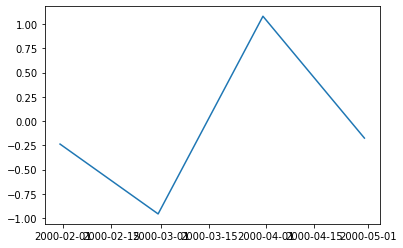

In [54]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('2000-01-01', periods=4, freq='M'))
plt.plot(ts)

In [58]:
ts.shift(2) # сдвиг на 2 периода вперед

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.237460
2000-04-30   -0.957252
Freq: M, dtype: float64

In [57]:
ts.shift(-2) # сдвиг на 2 периода назад

2000-01-31    1.080138
2000-02-29   -0.175660
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

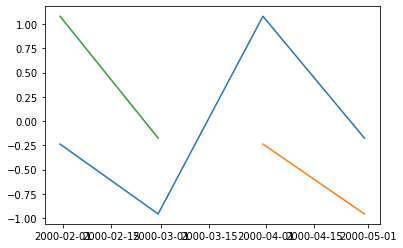

In [59]:
plt.plot(ts)
plt.plot(ts.shift(2))
plt.plot(ts.shift(-2))

НО! Такой "фокус" не пройдет, если у вас индекс состоит не из ```PeriodObject```, а временных меток (```TimeStamp```).

In [61]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

Преобразовать индекс из временных меток в периоды можно функцией ```to_period()```.

In [62]:
pts = ts.to_period()
pts.index

PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]', freq='M')

In [63]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2


2000-01-29    0.492989
2000-01-30   -0.801434
2000-01-31    0.528210
2000-02-01    0.233728
2000-02-02   -0.544799
2000-02-03   -0.154798
Freq: D, dtype: float64

In [65]:
pts2 = ts2.to_period('M')
pts2.index

PeriodIndex(['2000-01', '2000-01', '2000-01', '2000-02', '2000-02', '2000-02'], dtype='period[M]', freq='M')

Обратное преобразование выполняется методом ```to_timestamp()```

In [68]:
pts3 = pts2.to_timestamp(how='end')
pts3.index

DatetimeIndex(['2000-01-31 23:59:59.999999999',
               '2000-01-31 23:59:59.999999999',
               '2000-01-31 23:59:59.999999999',
               '2000-02-29 23:59:59.999999999',
               '2000-02-29 23:59:59.999999999',
               '2000-02-29 23:59:59.999999999'],
              dtype='datetime64[ns]', freq=None)

__ЗАДАНИЕ__: Загрузите данные с ежечасной статистикой веб-трафика ```data/web_traffic.tsv```. Увы, дата начала сбора статистики неизвестна, известно, что последний день - 10 ноября 2019 года. Задайте индекс в виде даты/времени.

<AxesSubplot:>

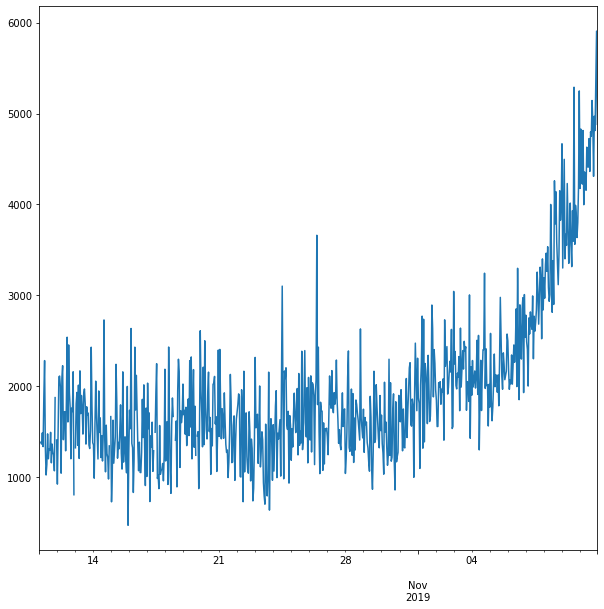

In [78]:
web_traffic = pd.read_csv('data/web_traffic.tsv', sep='\t', header=None, names=['Hour', 'ReqsPerHour'])


# ваш код здесь
ix = pd.date_range(end='2019-11-10 23:00', periods=web_traffic.shape[0], freq='H')
web_traffic.index = ix
plt.figure(figsize=(10,10))
web_traffic['ReqsPerHour'].plot()

Как "вытащить" периоды из загруженного датасета:

In [80]:
data = pd.read_csv('data/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [82]:
data.year
data.quarter

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [83]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

<AxesSubplot:>

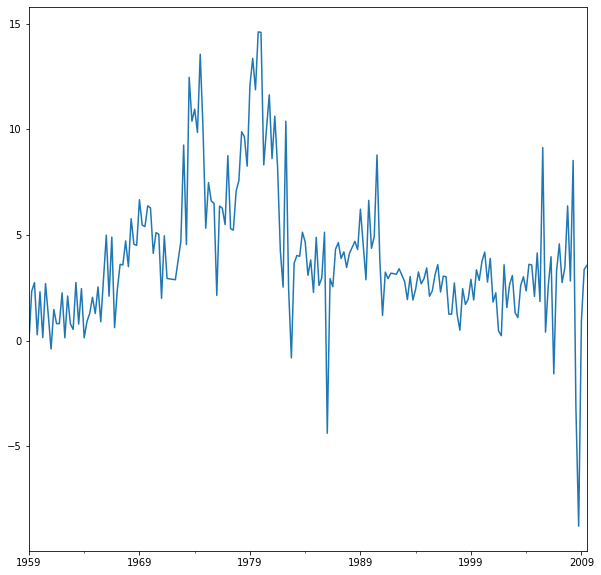

In [85]:
data.index = index
plt.figure(figsize=(10,10))
data.infl.plot()

__ЗАДАНИЕ__:

Загрузите датасет c данными по месячным температурам, постройте график. Сдвиньте график на год, на 2 года и на 5 лет, сравните. 

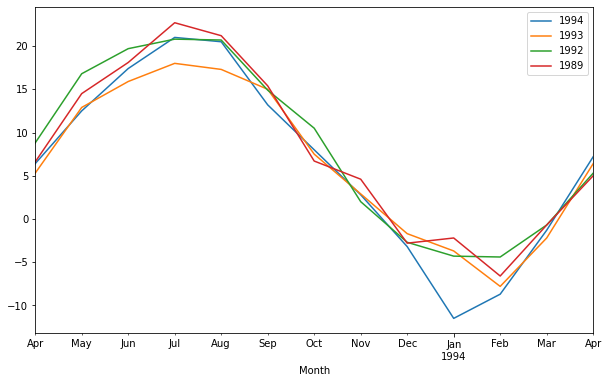

In [106]:
# plt.figure(figsize=(10,6))
temps = pd.read_csv('data/monthly-temperature-in-celsius-j.csv',
                      index_col=['Month'], parse_dates=['Month'], 
                      dayfirst=True)
# ваш код здесь
temps_m = temps.to_period('M')
plt.rcParams['figure.figsize'] = (10.0, 6)
fig = plt.figure()

shifts = [0, 1, 2, 5]
yfinish = np.max(temps_m.index).year
for shift in shifts:
    temps_m.shift(12*shift)['temperature'].plot(label=f"{yfinish-shift}")
fig.get_axes()[0].set_xlim(f"{yfinish-1}-04", f"{yfinish}-04")
plt.legend(loc="best")

### Ресемплинг


Повышающая дискретизация, upsampling

In [107]:
rng = pd.date_range('2020-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2020-01-01 00:00:00     0
2020-01-01 00:01:00     1
2020-01-01 00:02:00     2
2020-01-01 00:03:00     3
2020-01-01 00:04:00     4
2020-01-01 00:05:00     5
2020-01-01 00:06:00     6
2020-01-01 00:07:00     7
2020-01-01 00:08:00     8
2020-01-01 00:09:00     9
2020-01-01 00:10:00    10
2020-01-01 00:11:00    11
Freq: T, dtype: int64

In [110]:
ts.resample('5min', closed='right').sum()

2019-12-31 23:55:00     0
2020-01-01 00:00:00    15
2020-01-01 00:05:00    40
2020-01-01 00:10:00    11
Freq: 5T, dtype: int64

Понижающая дискретизация, downsampling

In [111]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-2.243158,1.059651,0.868286,-0.044272
2000-01-12,0.741342,1.065124,0.230268,-1.011761


In [114]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-2.243158,1.059651,0.868286,-0.044272
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.741342,1.065124,0.230268,-1.011761


In [115]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-2.243158,1.059651,0.868286,-0.044272
2000-01-06,-2.243158,1.059651,0.868286,-0.044272
2000-01-07,-2.243158,1.059651,0.868286,-0.044272
2000-01-08,-2.243158,1.059651,0.868286,-0.044272
2000-01-09,-2.243158,1.059651,0.868286,-0.044272
2000-01-10,-2.243158,1.059651,0.868286,-0.044272
2000-01-11,-2.243158,1.059651,0.868286,-0.044272
2000-01-12,0.741342,1.065124,0.230268,-1.011761


<AxesSubplot:>

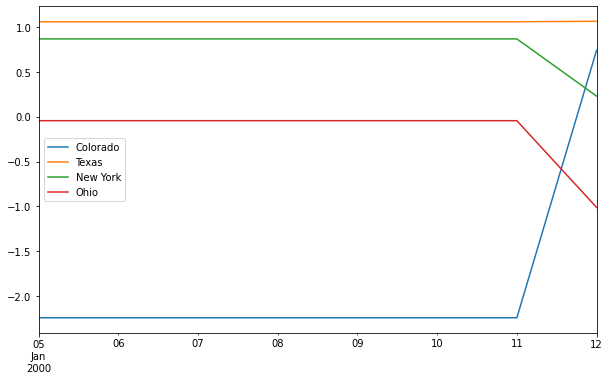

In [116]:
frame.resample('D').ffill().plot()

__ЗАДАНИЕ__: Для температурного датасета проеобразуйте период в "весна"-"лето"-"осень"-"зима" и постройте график. Сделайте сдвиги.

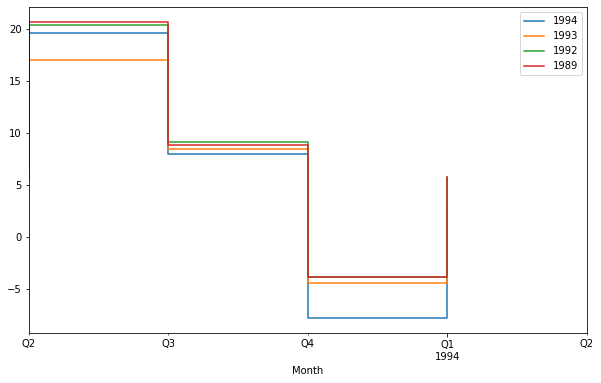

In [135]:
temperatures = pd.read_csv('data/monthly-temperature-in-celsius-j.csv',
                      index_col=['Month'], parse_dates=['Month'], 
                      dayfirst=True)
# ваш код здесь
fig = plt.figure()

t_season = temperatures.resample('QS-DEC', closed='left').mean()
# t_season['temperature'].plot()

shifts = [0, 1, 2, 5]
yfinish = np.max(temps_m.index).year
for shift in shifts:
    t_season.shift(4*shift)['temperature'].plot(drawstyle='steps-post', label=f"{yfinish-shift}")
fig.get_axes()[0].set_xlim(f"{yfinish-1}-04", f"{yfinish}-04")
plt.legend(loc="best")

### Статистический анализ временных рядов

Пример "скользящего среднего".

<AxesSubplot:>

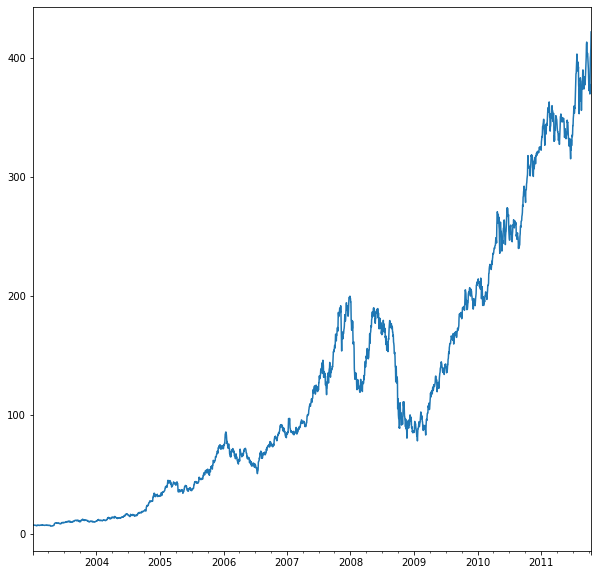

In [136]:
close_px_all = pd.read_csv('data/stock_px_2.csv', \
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
plt.rcParams['figure.figsize'] = (10.0, 10.0)
close_px['AAPL'].plot()

<AxesSubplot:>

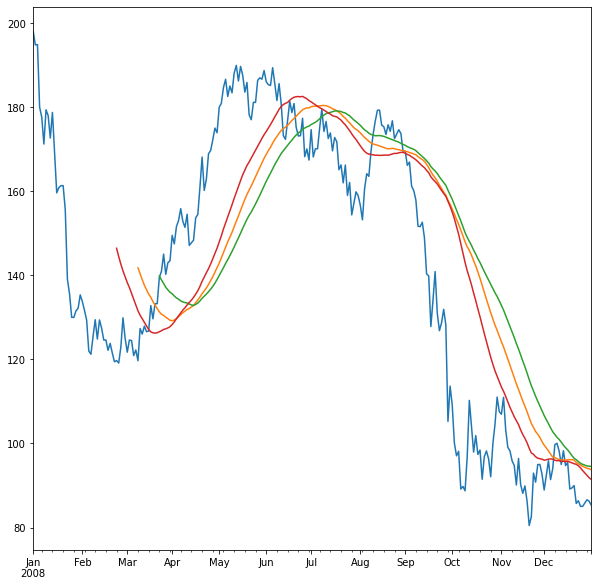

In [138]:
close_px = close_px['2008':'2008']

close_px.AAPL.plot()
close_px.AAPL.rolling(50).mean().plot()
close_px.AAPL.rolling(60).mean().plot()
close_px.AAPL.rolling(40).mean().plot()

#### STL-декомпозиция ряда

Для анализа ряда с ярко выраженной сезонностью используется STL-декомпозиция.

Она работает для двух моделей:

1) Аддитивная модель: используется, когда отколнения от тренда не сильно варьируется в определенных временных интервалах. Тогда наш показатель может быть представлен суммой, вычисляемой по формуле:\
        y(t) = уровень(t) + тренд(t) + сезонность(t) + шум(t)
    
2) Мультипликативная модель - используется, когда размах сезонности имеет выраженную зависимость от времени и тренда:\
        y(t) = уровень(t) * тренд(t) * сеознность(t) * шум(t)
        
Рассмотрим на примере датасета "продажи австралийского вина".

Text(0, 0.5, 'Wine sales')

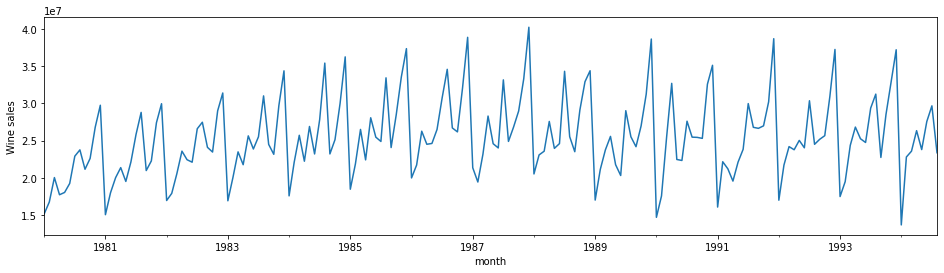

In [139]:
plt.figure(figsize=(16,4))
wine = pd.read_csv('data/monthly-australian-wine-sales.csv',
                   index_col=['month'], parse_dates=['month'], 
                   dayfirst=True)
wine.sales = wine.sales * 1000

wine.sales.plot()
plt.ylabel('Wine sales')

In [140]:
sm.tsa.seasonal_decompose?

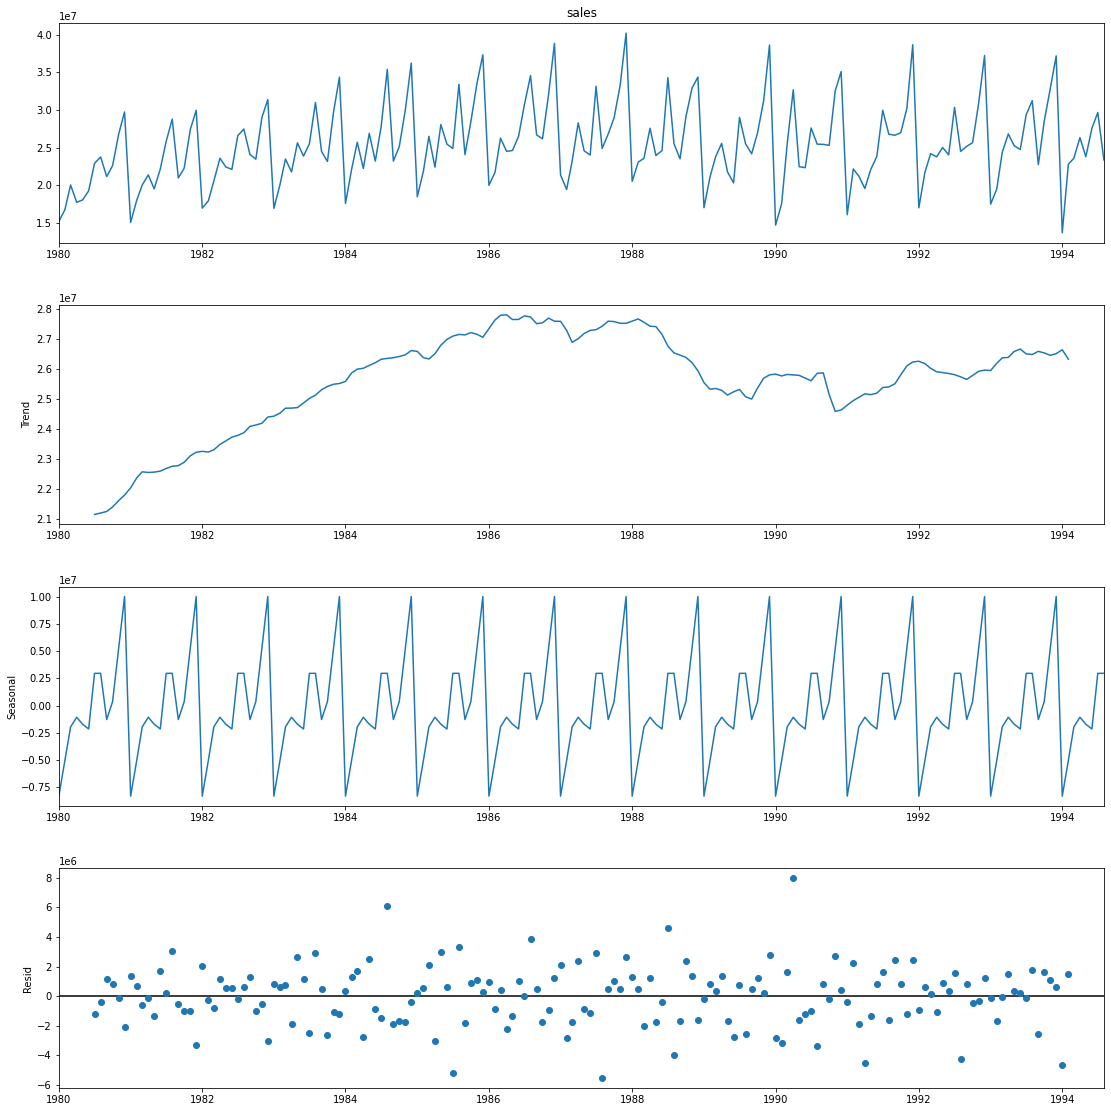

In [141]:
decomposition = sm.tsa.seasonal_decompose(wine.sales)
fig = decomposition.plot()
fig.set_figwidth(16)
fig.set_figheight(16)
plt.show()

Выведем отдельно тренд:

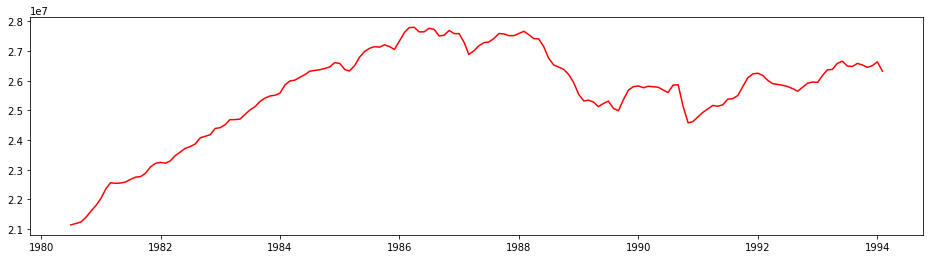

In [142]:
plt.figure(figsize=(16,4))
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

__ЗАДАНИЕ__: выполните STL-декомпозицию для статистики по запросам веб-сервера - за последние 3 дня, последнюю неделю и предшествующую ей неделю. Данные собирались ежечасно, последний день сбора данных - 10 ноября 2019 года

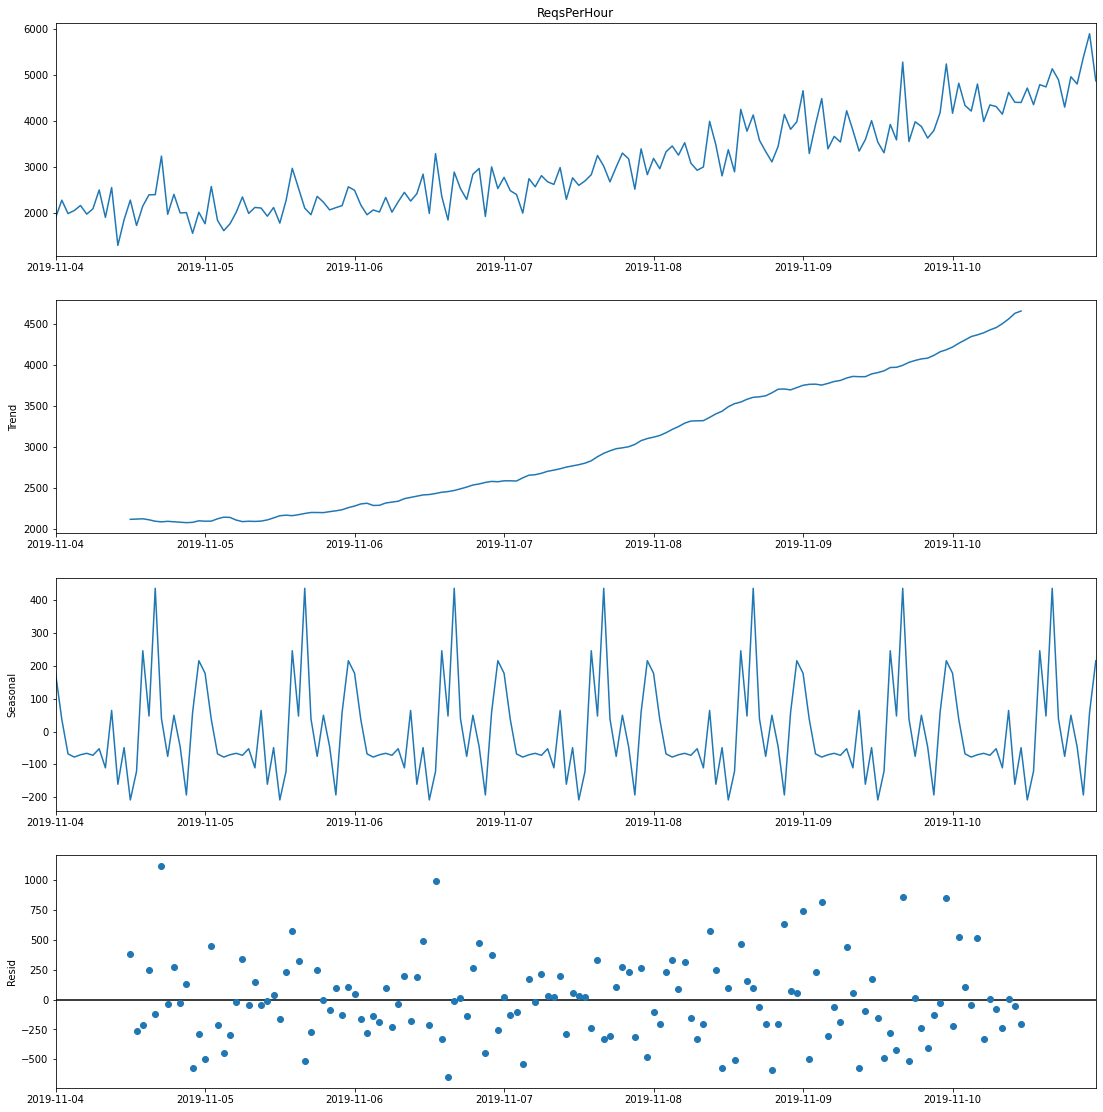

In [152]:
web_traffic = pd.read_csv('data/web_traffic.tsv', sep='\t', header=None, names=['Day', 'ReqsPerHour'])
web_traffic.head()

# ваш код здесь
web_traffic.index = pd.date_range(end='2019-11-10 23:00', periods=web_traffic.shape[0], freq='H')
web_traffic.fillna(0, inplace=True)
web_traffic_d = sm.tsa.seasonal_decompose(web_traffic.ReqsPerHour[-7*24:])
fig = web_traffic_d.plot()
fig.set_figwidth(16)
fig.set_figheight(16)
plt.show()